# Estrutura proposta para o projeto de aplicação

# Motivação e objetivo

Descrever nos próximos parágrafos a motivação (por quê) e o objetivo (o quê) do seu projeto de aplicação a ser apresentado para a disciplina.

# Descrição do dataset
- Descrever os dados do dataset escolhido para estimar o modelo supervisionado.
- Podem ser usados métodos de visualização de dados, resumo de dados (estatística descritiva), medidas de correlação entre as variáveis.
- Inserir o link externo da versão original do dataset.

In [126]:
# Desenvolver o código aqui.
#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz 

import os
import pandas as pd
import numpy as np


# Preparação dos dados
* Procure comentar toda a sequencia do código de tratamento dos dados.
* Podem ser usadas funções ou bibliotecas de apoio.
* Como preparação dos dados, incluem técnicas de:
    - limpeza de dados.
    - reestruturação de chaves.
    - deduplicação de dados.
    - validação de dados.
    - revisão de formato.
    - derivação de dados.
    - agregação de dados.
    - integração de dados.

In [108]:
# Desenvolver o código aqui.
# Baixa o dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# Coloca os dados em pandas dataframe
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets

#Informações dos valores do dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [109]:
#Estatísticas dos dados
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [110]:
#Como todos dados são armazenados em int64, pode-se avaliar a possibilidade de alterar para int8 de modo a consumir menos memória
#Para isso vamos listar os valores máximos em cada coluna e alterar aqueles que o máximo for menor que 256
for col,values in X.items():
    if values.max() < 256:
        #print(values)
        X[col] = X[col].astype('int8')

/var/folders/7y/qppj1bks2qlbndppyvf_945m0000gn/T/ipykernel_63275/1462335934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('int8')
/var/folders/7y/qppj1bks2qlbndppyvf_945m0000gn/T/ipykernel_63275/1462335934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('int8')
/var/folders/7y/qppj1bks2qlbndppyvf_945m0000gn/T/ipykernel_63275/1462335934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [111]:
#Verificando os item com tipo alterado
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int8 
 1   HighChol              253680 non-null  int8 
 2   CholCheck             253680 non-null  int8 
 3   BMI                   253680 non-null  int8 
 4   Smoker                253680 non-null  int8 
 5   Stroke                253680 non-null  int8 
 6   HeartDiseaseorAttack  253680 non-null  int8 
 7   PhysActivity          253680 non-null  int8 
 8   Fruits                253680 non-null  int8 
 9   Veggies               253680 non-null  int8 
 10  HvyAlcoholConsump     253680 non-null  int8 
 11  AnyHealthcare         253680 non-null  int8 
 12  NoDocbcCost           253680 non-null  int8 
 13  GenHlth               253680 non-null  int8 
 14  MentHlth              253680 non-null  int8 
 15  PhysHlth              253680 non-n

In [112]:
#Uso de memória reduzido de 40.6 MB para 5.1 MB
#Convertendo a variável y para int8 também
y = y.astype('int8')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int8 
dtypes: int8(1)
memory usage: 247.9 KB


In [113]:
# Varificando dados faltantes
missing_values = X.isnull().sum()
missing_values

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Nenhum dado faltante foi encontrado

In [114]:
#Proporção entra as classes
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

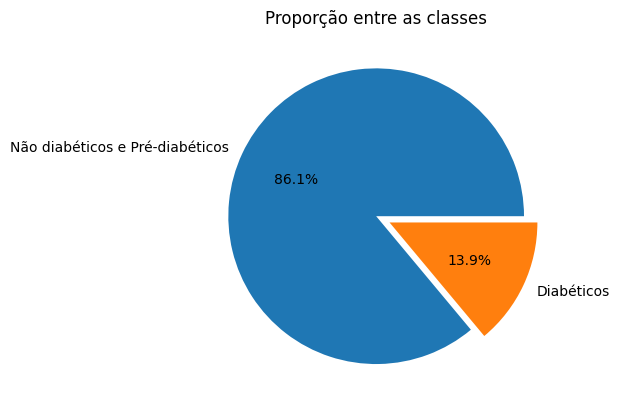

In [116]:
#Visualização da proporção entre diabéticos e não diabéticos
fig, ax = plt.subplots()
ax.pie(y.value_counts(),
       labels=['Não diabéticos e Pré-diabéticos','Diabéticos'],
       autopct='%1.1f%%',
       explode = (0, 0.1))
ax.set_title('Proporção entre as classes')
plt.show()


O dataset está desbalanceado. Como o dataset utilizado é muito grande, optou-se por balancear as classes selecionando uma amostra aleatória dentre os pacientes Não Diabéticos de modo a ficar na mesma proporção. Com isso, será possível treinar os modelos com os recursos computacionais disponíveis.

In [141]:
#Balanceamento.
#Juntar o X e y para fazer o balanceamento
dataset = X.join(y)

#Separa as linhas que contem 0 (Não diabéticos e pré) e 1 (Diabéticos)
nao_diab = dataset[dataset['Diabetes_binary'] == 0]
diabeticos = dataset[dataset['Diabetes_binary'] == 1]

#Seleciona aleatoriamente o mesmo número de não diabéticos para compor essa classe
nao_diab_random = nao_diab.take(np.random.permutation(len(nao_diab))[:len(diabeticos)])

#Junta os datasets e ajusta o indice
dataset_b = pd.concat([diabeticos,nao_diab_random])
dataset_b = dataset_b.sort_index()
dataset_b = dataset_b.reset_index()

#Obtem o dataset com classes balanceadas
X_b = dataset_b.drop('Diabetes_binary',axis=1)
y_b = dataset_b['Diabetes_binary']

In [146]:
#Proporção entra as classes
y_b.value_counts()

Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64

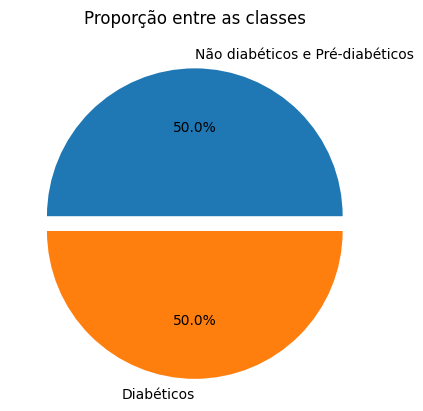

In [144]:
#Visualização da proporção entre diabéticos e não diabéticos no dataset balanceado
fig, ax = plt.subplots()
ax.pie(y_b.value_counts(),
       labels=['Não diabéticos e Pré-diabéticos','Diabéticos'],
       autopct='%1.1f%%',
       explode = (0, 0.1))
ax.set_title('Proporção entre as classes')
plt.show()

# Treinamento do modelo de aprendizado de máquina
- Seleção do(s) modelo(s) supervisionado(s).
- Grid com os hiperparâmetros.
- Amostras usadas para treinamento, validação e teste, e método de validação usado.
- Medidas de desempenho usadas para otimização.

In [148]:
# Dividir os dados em conjuntos de treinamento e teste (por exemplo, 80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
# Transformar y_train e y_test em vetores unidimensionais
y = y.values.ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [159]:
# Desenvolver o código aqui.
# Defina os modelos que você deseja testar
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    #'Logistic Regression': LogisticRegression()
}

# Defina os parâmetros que você deseja ajustar para cada modelo
parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1], 'gamma': [0.1, 0.01]},
    #'Logistic Regression': {'C': [0.1, 1, 10]}
}

In [160]:
best_model = None
best_score = 0

# Iterar sobre os modelos e parâmetros para encontrar o melhor modelo
for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train, y_train)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# O melhor modelo e seus parâmetros
print("Melhor modelo:", best_model)

Decision Tree: 0.7271940454356106
Random Forest: 0.7433380915004845
SVM: 0.5756900417197535
Melhor modelo: RandomForestClassifier(n_estimators=200)


# Avaliação
- Matriz confusão.
- Medidas de desempenho usadas para o teste.
- Visualização (Curva ROC)

In [161]:
# Desenvolver o código aqui.
# Faça previsões nos dados de teste
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7001
           1       0.73      0.79      0.76      7138

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



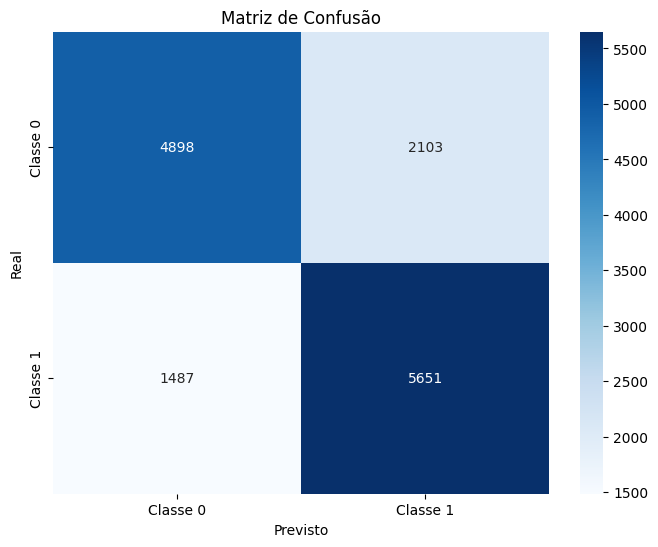

In [162]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Crie um heatmap da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1'], 
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Conclusão
- Dificuldades encontradas
- Próximos passos.